<function matplotlib.pyplot.show(close=None, block=None)>

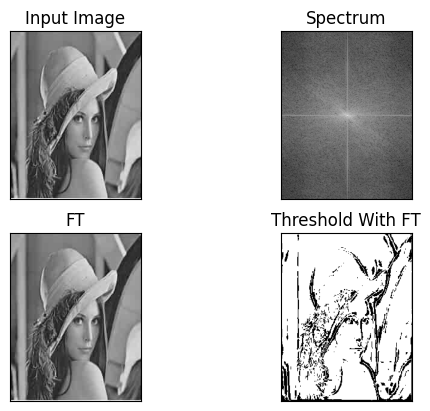

In [4]:
#Chapter3_7.1 푸리에 변환

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread ('lena.jpg',cv2.IMREAD_GRAYSCALE)

#이미지에 푸리에변환 적용
f = np.fft.fft2(img)

#분석을 쉽게 하기 위해 주파수가 0인 부분을 중앙에 위치 시킴
#중앙에 저주파가 모이게 됨

fshift = np.fft.fftshift(f)
#Spectrum을 구하는 수학식

magnitude_spectrum = 20*np.log(np.abs(fshift))

rows, cols= img.shape
crow,ccol = int(rows/2),int(cols/2) #이미지의 중심 좌표

#중앙에서 10 x 10 사이즈의 사각형의 값을 1로 설정함
#중앙의 저주파를 모두 제거
#저주파를 제거하였기 때문에 배경이 사라지고 경계선만 남게 됨

d=10

fshift[crow-d:crow+d,ccol-d:ccol+d]=1

#푸리에 변환결과를 다시 이미지로 변환

f_shift= np.fft.ifftshift(fshift)
img_back=np.fft.ifft2(f_shift)
img_back= np.abs(img_back)

#threshold를 적용하기 위해 float 타입을 int타입으로 변환
img_new = np.uint8(img_back) ;
_, thresh = cv2.threshold(img_new,30,255,cv2.THRESH_BINARY_INV)

plt.subplot(221),plt.imshow(img,cmap='gray')
plt.title('Input Image')
plt.xticks([]),plt.yticks([])

plt.subplot(222)
plt.imshow(magnitude_spectrum,cmap='gray')
plt.title('Spectrum')
plt.xticks([]),plt.yticks([])

plt.subplot(223)
plt.imshow(img,cmap='gray')
plt.title('FT')
plt.xticks([]),plt.yticks([])

plt.subplot(224),plt.imshow(thresh,cmap='gray')
plt.title('Threshold With FT')
plt.xticks([]),plt.yticks([])
plt.show